In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:,.2f}'.format #supress scientific notation
plt.rcParams['figure.figsize'] = (16,8)

In [62]:
df = pd.read_csv("Dataset/avocado.csv",index_col='Date')
df.index = pd.to_datetime(df.index)

In [63]:
del df['Unnamed: 0']
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-12-27,1.33,"64,236.62","1,036.74","54,454.85",48.16,"8,696.87","8,603.62",93.25,0.00,conventional,2015,Albany
2015-12-20,1.35,"54,876.98",674.28,"44,638.81",58.33,"9,505.56","9,408.07",97.49,0.00,conventional,2015,Albany
2015-12-13,0.93,"118,220.22",794.70,"109,149.67",130.50,"8,145.35","8,042.21",103.14,0.00,conventional,2015,Albany
2015-12-06,1.08,"78,992.15","1,132.00","71,976.41",72.58,"5,811.16","5,677.40",133.76,0.00,conventional,2015,Albany
2015-11-29,1.28,"51,039.60",941.48,"43,838.39",75.78,"6,183.95","5,986.26",197.69,0.00,conventional,2015,Albany


In [64]:
df['Revenue'] = df['Total Volume'] * df['AveragePrice']
df['Revenue'] = df['Revenue'].astype(int)

#### Which city have the highest avocado sales?

In [65]:
Sales_by_region = df.groupby(['region'])['Revenue'].sum()
Sales_by_region.values.astype(int)
print("These are the top 5 largest revenue generating regions:")
Sales_by_region.sort_values(ascending=False)[:4]


These are the top 5 largest revenue generating regions:


region
TotalUS      6,387,592,930.00
California   1,121,413,853.00
West         1,066,833,476.00
Northeast      960,007,701.00
Name: Revenue, dtype: float64

In [86]:
p =Sales_by_region
p1 = p.nlargest(5,'first')
p2 = p.nsmallest(5,'first')
print(p1)
p2

region
TotalUS        6,387,592,930.00
California     1,121,413,853.00
West           1,066,833,476.00
Northeast        960,007,701.00
SouthCentral     874,059,118.00
Name: Revenue, dtype: float64


region
Syracuse     15,205,026.00
Boise        15,346,495.00
Spokane      17,156,321.00
Louisville   17,495,386.00
Albany       21,766,559.00
Name: Revenue, dtype: float64

#### Which region have the highest avocado average price?

In [32]:
price_by_region = df.groupby(['region'])['AveragePrice'].mean()
print("These are the top 5 largest average price by regions:")
price_by_region.sort_values(ascending=False)[:4]

These are the top 5 largest average price by regions:


region
HartfordSpringfield    1.818639
SanFrancisco           1.804201
NewYork                1.727574
Philadelphia           1.632130
Name: AveragePrice, dtype: float64

In [ ]:
p=price_by_region.sort_values(ascending=False)


#### What is the average price for Avocado across the year in all region?

In [27]:
Price_by_year = df.groupby(['year'])['AveragePrice'].mean()
Price_by_year.sort_values(ascending=False)

year
2017    1.515128
2015    1.375590
2018    1.347531
2016    1.338640
Name: AveragePrice, dtype: float64

#### What is the total revenue by year for each region?

In [66]:
revenue_by_year = df.groupby(['region','year'])['Revenue'].sum()
revenue_by_year.sort_values(ascending=False)

region      year
TotalUS     2017   2,250,703,956.00
            2016   1,884,641,431.00
            2015   1,693,556,955.00
            2018     558,690,588.00
California  2017     386,774,729.00
                         ...       
Albany      2018       2,045,262.00
Louisville  2018       1,543,752.00
Spokane     2018       1,446,194.00
Boise       2018       1,438,535.00
Syracuse    2018       1,309,812.00
Name: Revenue, Length: 216, dtype: float64

#### What is the total revenue for each region?

In [70]:
aggregate_by_year = df.groupby(['year']).agg({'Revenue': np.sum, 
                                            'AveragePrice': np.mean,
                                            'Total Volume': np.sum})
aggregate_by_year

,Revenue,AveragePrice,Total Volume
year,,,
2015,"4,488,445,576.00",1.38,"4,385,468,662.04"
2016,"4,997,587,166.00",1.34,"4,820,889,891.83"
2017,"5,965,747,148.00",1.52,"4,934,305,699.27"
2018,"1,482,341,961.00",1.35,"1,382,738,340.26"


#### Code to be fix

In [200]:
revenue_by_region = df.groupby(['region','year'])['Revenue'].sum()
rev1 = revenue_by_region.reset_index()
rev1.sort_index(axis=0, level=['region', 'Revenue'], ascending=True)

,region,year,Revenue
0,Albany,2015,"4,764,464.00"
1,Albany,2016,"7,009,168.00"
2,Albany,2017,"7,947,665.00"
3,Albany,2018,"2,045,262.00"
4,Atlanta,2015,"24,515,411.00"
...,...,...,...
211,West,2018,"91,935,797.00"
212,WestTexNewMexico,2015,"32,242,424.00"
213,WestTexNewMexico,2016,"36,941,933.00"
214,WestTexNewMexico,2017,"42,162,206.00"


In [204]:
print(revenue_by_region)
revenue_by_region.rank()

region            year
Albany            2015    4,764,464.00
                  2016    7,009,168.00
                  2017    7,947,665.00
                  2018    2,045,262.00
Atlanta           2015   24,515,411.00
                              ...     
West              2018   91,935,797.00
WestTexNewMexico  2015   32,242,424.00
                  2016   36,941,933.00
                  2017   42,162,206.00
                  2018   10,218,689.00
Name: Revenue, Length: 216, dtype: float64


region            year
Albany            2015    26.00
                  2016    41.00
                  2017    47.00
                  2018     5.00
Atlanta           2015   120.00
                          ...  
West              2018   183.00
WestTexNewMexico  2015   139.00
                  2016   146.00
                  2017   155.00
                  2018    63.00
Name: Revenue, Length: 216, dtype: float64

In [152]:
price_rev_region = df.groupby(['region']).agg({'Revenue':sum, 
                                               'AveragePrice': np.mean})
reg = price_rev_region.sort_values(by=['Revenue'], ascending=False)
reg

,Revenue,AveragePrice
region,,
TotalUS,"6,387,592,930.00",1.32
California,"1,121,413,853.00",1.40
West,"1,066,833,476.00",1.27
Northeast,"960,007,701.00",1.60
SouthCentral,"874,059,118.00",1.10
...,...,...
Albany,"21,766,559.00",1.56
Louisville,"17,495,386.00",1.29
Spokane,"17,156,321.00",1.45


In [145]:
fig = plt.figure(figsize=(18,12))
ax = fig.clf()

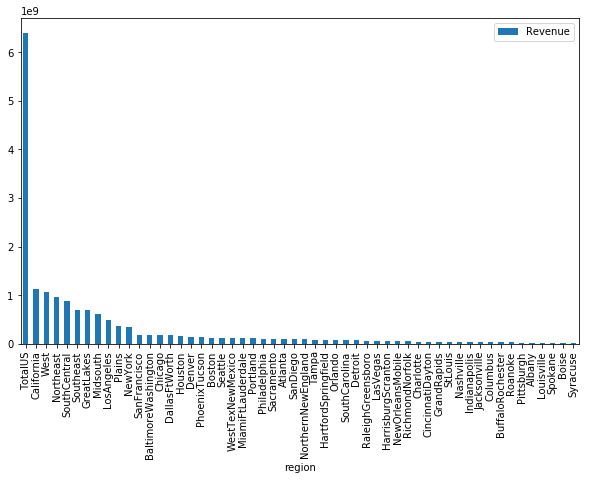

In [153]:
reg.plot(ax=ax,x=reg.index, y='Revenue', kind='bar', figsize=(10,6))
